http://archive.ics.uci.edu/ml/machine-learning-databases/iris/Index

http://archive.ics.uci.edu/ml/machine-learning-databases/iris/bezdekIris.data

http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names


아이리스(iris)의 꽃받침과 꽃입의 크기로부터 폼종을 예측하도록 학습하기 위한 데이터

## 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 데이터셋 준비

사이킷런 말고 링크로 불러왔다.

In [ ]:
flowers = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',')
flowers

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


- sepal length (cm): 꽃받침의 길이
- petal length (cm): 꽃잎의 길이
- sepal width (cm): 꽃받침의 폭
- petal width (cm): 꽃잎의 폭
- species: 꽃의 종류

제목행에 데이터가 들어가서 제목행 삽입

In [ ]:
new_columns = ['sepal length', 'petal length', 'sepal width', 'petal width', 'species']

flowers.columns = new_columns
flowers

,sepal length,petal length,sepal width,petal width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


제목행 때문에 지워진 데이터를 1행에 추가

In [ ]:
new_data = [5.1, 3.5, 1.4, 0.2, 'Iris-setosa']

flowers.loc[1] = new_data
flowers

,sepal length,petal length,sepal width,petal width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


원래 1행에 있던 데이터가 삭제 돼서 마지막 행에 추가

In [ ]:
new_data = [5.1, 3.5, 1.4, 0.2, 'Iris-setosa']

flowers.loc[len(flowers)] = new_data
flowers

,sepal length,petal length,sepal width,petal width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


## 데이터 전처리

In [ ]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   petal length  150 non-null    float64
 2   sepal width   150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


null값은 없었지만 범주형 변수인 species가 있다.

species에 무엇이 들었는지 확인해보겠다.

In [ ]:
flowers['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Iris-setosa, Iris-versicolor, Iris-virginica 이 3개의 종이 균등하게 들어 있어 분해한다.

In [ ]:
flowers_onehot = pd.get_dummies(flowers,columns=['species'])
flowers_onehot

,sepal length,petal length,sepal width,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,4.9,3.0,1.4,0.2,1,0,0
1,4.7,3.2,1.3,0.2,1,0,0
2,4.6,3.1,1.5,0.2,1,0,0
3,5.0,3.6,1.4,0.2,1,0,0
4,5.4,3.9,1.7,0.4,1,0,0
...,...,...,...,...,...,...,...
145,6.3,2.5,5.0,1.9,0,0,1
146,6.5,3.0,5.2,2.0,0,0,1
147,6.2,3.4,5.4,2.3,0,0,1
148,5.9,3.0,5.1,1.8,0,0,1


In [ ]:
flowers_onehot.describe()

,sepal length,petal length,sepal width,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


이상값을 확인한다.

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal width'}>,
        <Axes: title={'center': 'species_Iris-setosa'}>,
        <Axes: title={'center': 'species_Iris-versicolor'}>],
       [<Axes: title={'center': 'species_Iris-virginica'}>, <Axes: >,
        <Axes: >]], dtype=object)

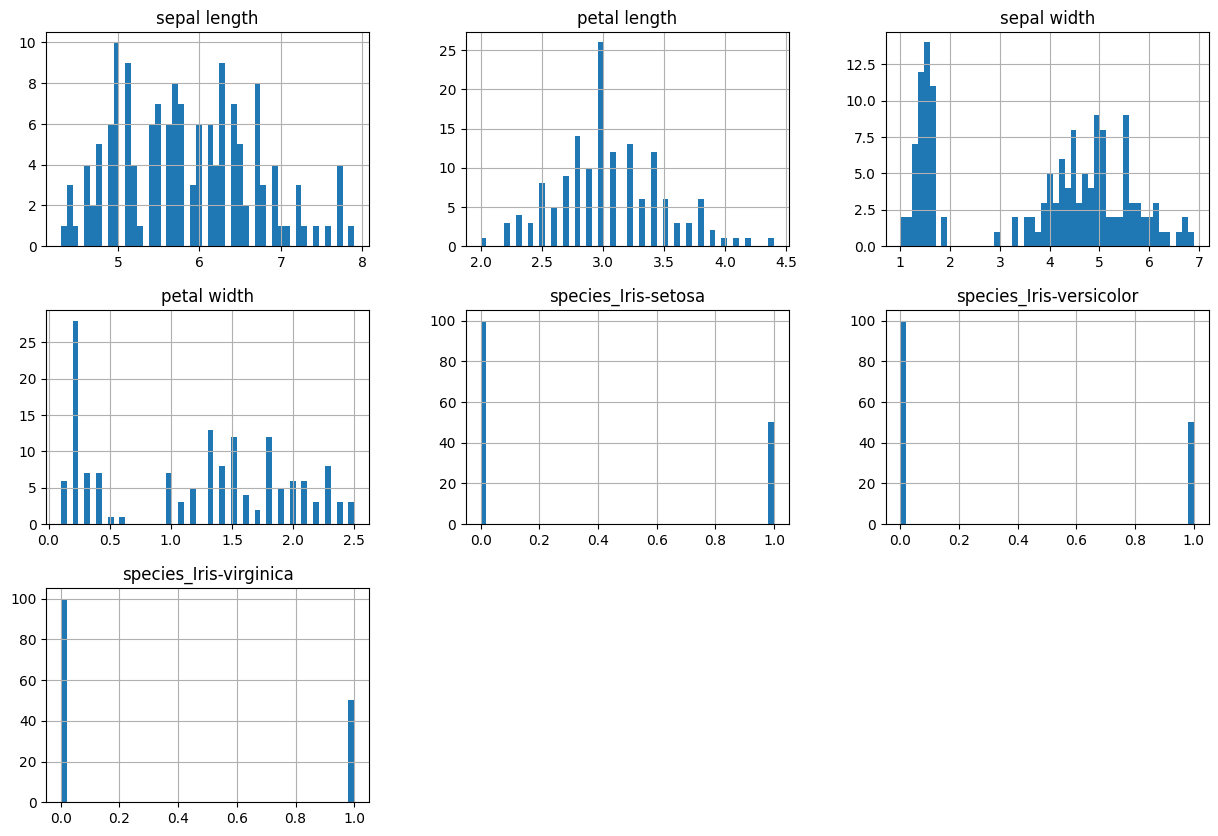

In [ ]:
flowers_onehot.hist(bins=50,figsize=(15,10))

꽃의 실제값이라 이상치는 따로 보이지 않는다.

각 변수의 상관관계 그래프를 그린다.


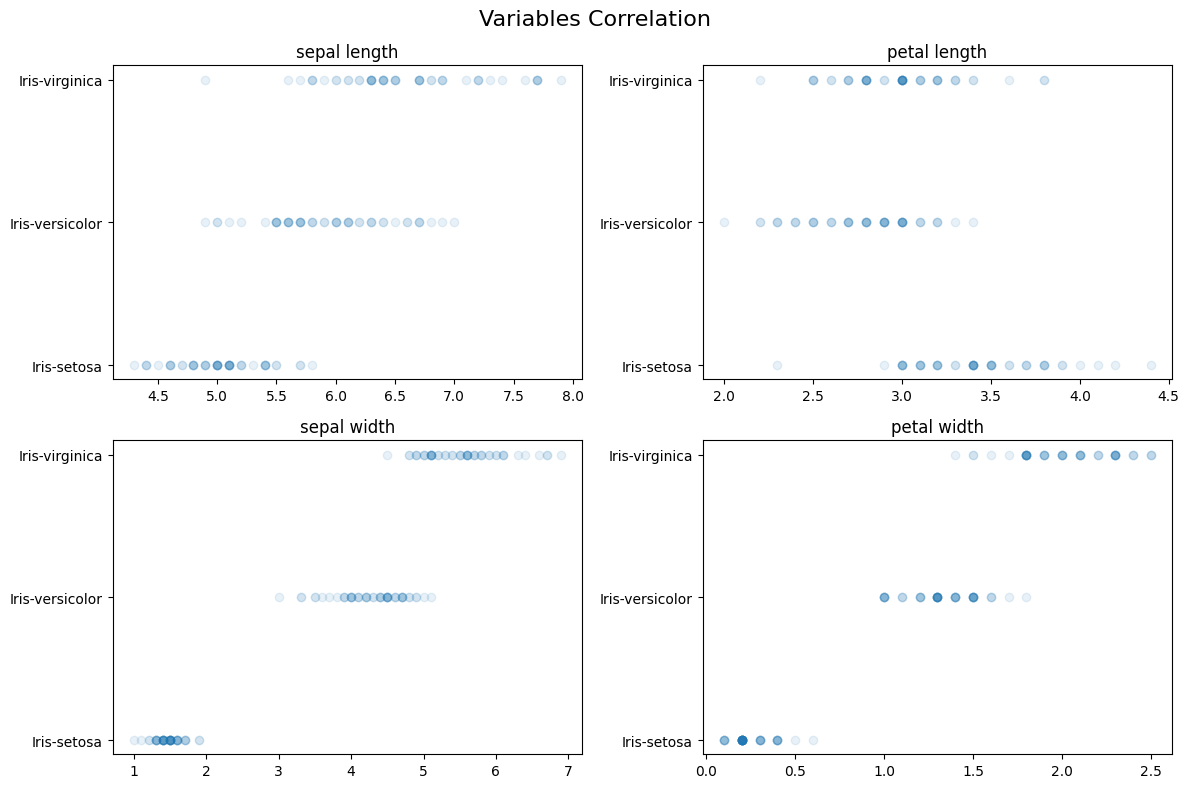

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].scatter(x=flowers['sepal length'], y=flowers['species'], alpha=0.1)
axes[0, 0].set_title('sepal length')

axes[0, 1].scatter(x=flowers['petal length'], y=flowers['species'], alpha=0.1)
axes[0, 1].set_title('petal length')

axes[1, 0].scatter(x=flowers['sepal width'], y=flowers['species'], alpha=0.1)
axes[1, 0].set_title('sepal width')

axes[1, 1].scatter(x=flowers['petal width'], y=flowers['species'], alpha=0.1)
axes[1, 1].set_title('petal width')

# 전체 그래프 제목 설정
fig.suptitle('Variables Correlation', size=16)

# 그래프 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

뭔가 이상해서 품종끼리 나눠서 그려본다.

In [ ]:
df1 = flowers_onehot.iloc[:49]    # 첫 번째 세분할
df2 = flowers_onehot.iloc[49:99]  # 두 번째 세분할
df3 = flowers_onehot.iloc[99:-1]   # 세 번째 세분할
df4 = flowers_onehot.iloc[-1:]   # 네 번째 세분할 (마지막 행)

# 첫 번째 세분할에 마지막 행 추가
df1 = pd.concat([df1, df4])

df1 = df1.drop(['species_Iris-versicolor', 'species_Iris-virginica'], axis=1)
df2 = df2.drop(['species_Iris-setosa', 'species_Iris-virginica'], axis=1)
df3 = df3.drop(['species_Iris-setosa', 'species_Iris-versicolor'], axis=1)

In [ ]:
df1

,sepal length,petal length,sepal width,petal width,species_Iris-setosa
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,5.4,3.9,1.7,0.4,1
5,4.6,3.4,1.4,0.3,1
6,5.0,3.4,1.5,0.2,1
7,4.4,2.9,1.4,0.2,1
8,4.9,3.1,1.5,0.1,1
9,5.4,3.7,1.5,0.2,1


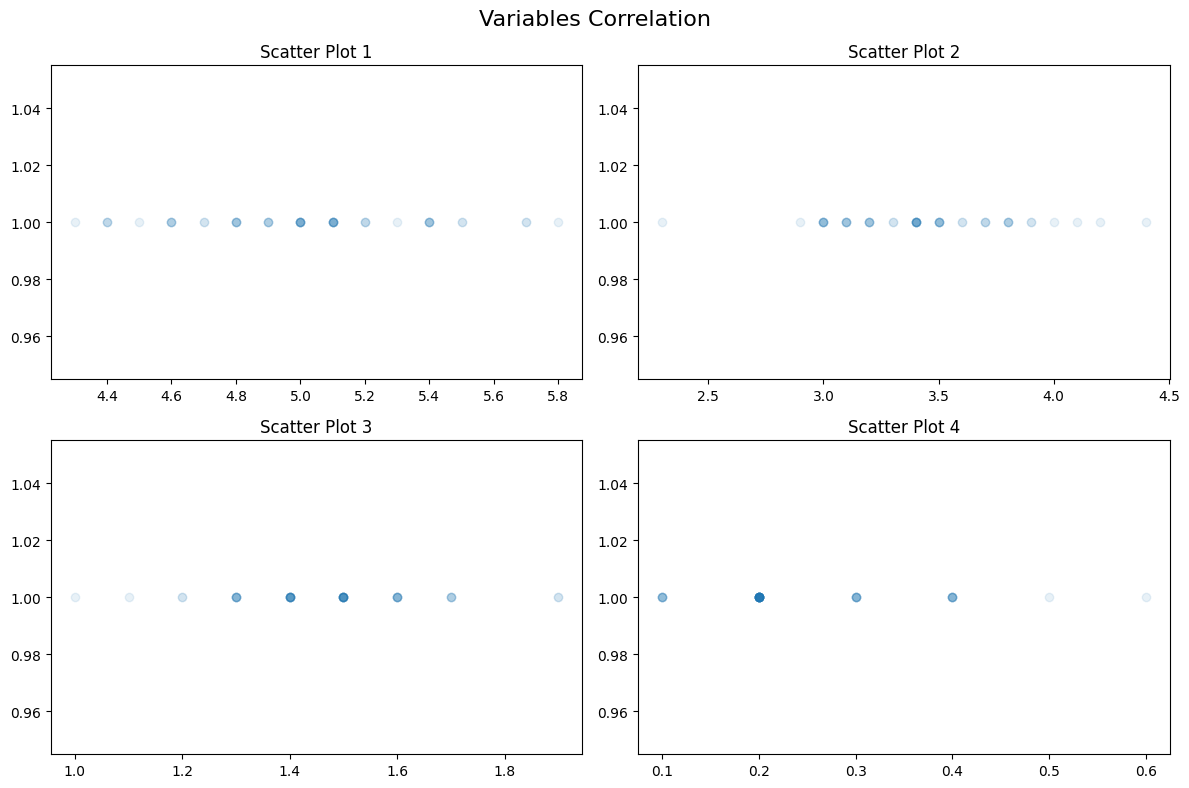

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].scatter(x=df1['sepal length'], y=df1['species_Iris-setosa'], alpha=0.1)
axes[0, 0].set_title('Scatter Plot 1')

axes[0, 1].scatter(x=df1['petal length'], y=df1['species_Iris-setosa'], alpha=0.1)
axes[0, 1].set_title('Scatter Plot 2')

axes[1, 0].scatter(x=df1['sepal width'], y=df1['species_Iris-setosa'], alpha=0.1)
axes[1, 0].set_title('Scatter Plot 3')

axes[1, 1].scatter(x=df1['petal width'], y=df1['species_Iris-setosa'], alpha=0.1)
axes[1, 1].set_title('Scatter Plot 4')

fig.suptitle('Variables Correlation', size=16)

plt.tight_layout()

plt.show()

타겟이 1밖에 없어서 산점도가 소용이 없다는 것을 알았다.

## 데이터 나누기

In [ ]:
inputs = flowers_onehot[['sepal length', 'petal length', 'sepal width', 'petal width']]
targets = flowers_onehot[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

In [ ]:
inputs

,sepal length,petal length,sepal width,petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3
148,5.9,3.0,5.1,1.8


In [ ]:
targets

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
inputs_train = inputs[:-2]
targets_train = targets[:-2]
inputs_test = inputs[-2:]
targets_test = targets[-2:]

## 학습

#### 초기모델
- 2층 신경망
- 노드 4->10->3
- 활성화 함수: sigmoid 함수
- 손실 함수 : categorical_crossentropy 함수
- 학습률 0.05
- 학습 횟수 100회
- 배치 사이즈 25

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model,self).__init__()
    initializer = tf.keras.initializers.glorot_uniform()
    self.b1 = tf.Variable(initializer([10]))
    self.w1 = tf.Variable(initializer([4,10]))
    self.b2 = tf.Variable(initializer([3]))
    self.w2 = tf.Variable(initializer([10,3]))
    

  def call(self,inputs):
    y = self.b1 + inputs @ self.w1
    y = tf.keras.activations.sigmoid(y)
    y = self.b2 + y @ self.w2
    return tf.squeeze(y)

def loss(target, y):
  return tf.reduce_mean((tf.constant(target, dtype=tf.float32)-y)**2)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt,loss = 'categorical_crossentropy')
history = model.fit(inputs_train.astype(np.float32), targets_train.astype(np.float32), epochs=100, batch_size=25)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 5.4454
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 5.4453
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 5.4453
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 5.4453
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 5.4453
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 5.4453
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 5.4453
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 5.4453
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 5.4453
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 5.4453
Epoch 11/100
6/6 [==============================] - 0s 4ms/step - loss: 5.4453
Epoch 12/100
6/6 [==============================] - 0s 4ms/step - loss: 5.4453
Epoch 13/100
6/6 [==============================] - 0s 4ms/st

<Axes: >

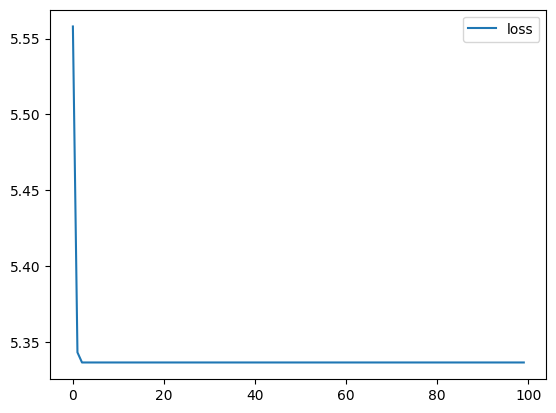

In [ ]:
pd.DataFrame(history.history).plot()

최소 손실값 : 5.4453 그래프도 잘 나왔다.

#### 2차모델
- 4층 신경망
- 노드 4->16->36->18->3
- 활성화 함수: sigmoid 함수
- 손실 함수 : categorical_crossentropy 함수
- 학습률 0.05
- 학습 횟수 100회
- 배치 사이즈 25

In [ ]:
class Model(tf.keras.Model):
  def __init__(self):
      super(Model,self).__init__()
      initializer = tf.keras.initializers.glorot_uniform()
      self.w1 = tf.Variable(initializer([4,16]))
      self.b1 = tf.Variable(initializer([16]))
      self.w2 = tf.Variable(initializer([16,36]))
      self.b2 = tf.Variable(initializer([36]))
      self.w3 = tf.Variable(initializer([36,18]))
      self.b3 = tf.Variable(initializer([18]))
      self.w4 = tf.Variable(initializer([18,3]))
      self.b4 = tf.Variable(initializer([3]))

  def call(self,inputs):
      y = self.b1 + inputs @ self.w1
      y = tf.keras.activations.sigmoid(y)
      y = self.b2 + y @ self.w2
      y = tf.keras.activations.sigmoid(y)
      y = self.b3 + y @ self.w3
      y = tf.keras.activations.sigmoid(y)
      y = self.b4 + y @ self.w4
      y = tf.keras.activations.sigmoid(y)
      return tf.squeeze(y)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt,loss = 'categorical_crossentropy')
history = model.fit(inputs_train.astype(np.float32), targets_train.astype(np.float32), epochs=100, batch_size=25)

Epoch 1/100
6/6 [==============================] - 2s 5ms/step - loss: 1.1174
Epoch 2/100
6/6 [==============================] - 0s 6ms/step - loss: 1.1137
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1117
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1095
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 1.1089
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1069
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1064
Epoch 8/100
6/6 [==============================] - 0s 6ms/step - loss: 1.1051
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1045
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 1.1040
Epoch 11/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1035
Epoch 12/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1037
Epoch 13/100
6/6 [==============================] - 0s 5ms/st

<Axes: >

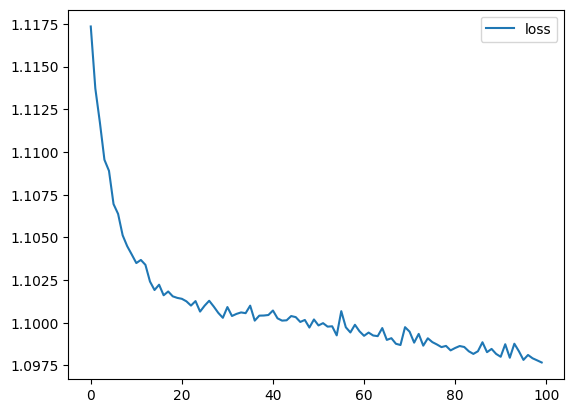

In [ ]:
pd.DataFrame(history.history).plot()

그래프가 조금 진동하긴 하지만 손실 값은 낮아졌다.

최소 손실값 : 1.0977

#### 3차모델
- 6층 신경망
- 노드 4->16->24->36->27->18->3
- 활성화 함수: sigmoid 함수
- 손실 함수 : categorical_crossentropy 함수
- 학습률 0.05
- 학습 횟수 100회
- 배치 사이즈 25

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([4,16]))
        self.b1 = tf.Variable(initializer([16]))
        self.w2 = tf.Variable(initializer([16,24]))
        self.b2 = tf.Variable(initializer([24]))
        self.w3 = tf.Variable(initializer([24,36]))
        self.b3 = tf.Variable(initializer([36]))
        self.w4 = tf.Variable(initializer([36, 27]))
        self.b4 = tf.Variable(initializer([27]))
        self.w5 = tf.Variable(initializer([27, 18]))
        self.b5 = tf.Variable(initializer([18]))
        self.w6 = tf.Variable(initializer([18,3]))
        self.b6 = tf.Variable(initializer([3]))

    def call(self,inputs): 
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.sigmoid(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.sigmoid(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.sigmoid(y3)
        y4 = self.b4 + y3 @ self.w4
        y4 = tf.keras.activations.sigmoid(y4)
        y5 = self.b5 + y4 @ self.w5
        y5 = tf.keras.activations.sigmoid(y5)
        y6 = self.b6 + y5 @ self.w6
        y6 = tf.keras.activations.sigmoid(y6)
        return tf.squeeze(y6)

def loss(target,y):
    return tf.reduce_mean((target-y)**2)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt,loss = 'categorical_crossentropy')
history = model.fit(inputs_train.astype(np.float32), targets_train.astype(np.float32), epochs=100, batch_size=25)

Epoch 1/100
6/6 [==============================] - 3s 7ms/step - loss: 1.1960
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1641
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1445
Epoch 4/100
6/6 [==============================] - 0s 7ms/step - loss: 1.1315
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 1.1220
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1159
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1119
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1083
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 1.1062
Epoch 10/100
6/6 [==============================] - 0s 7ms/step - loss: 1.1045
Epoch 11/100
6/6 [==============================] - 0s 7ms/step - loss: 1.1032
Epoch 12/100
6/6 [==============================] - 0s 5ms/step - loss: 1.1023
Epoch 13/100
6/6 [==============================] - 0s 6ms/s

<Axes: >

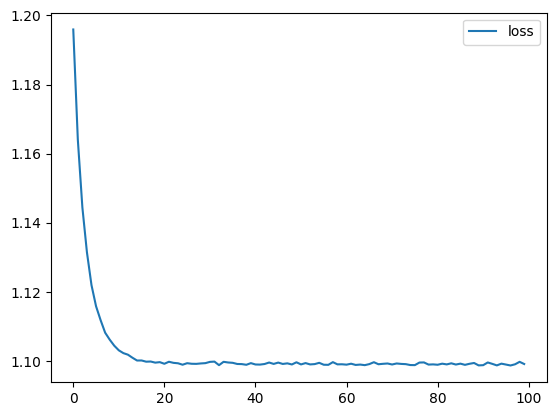

In [ ]:
pd.DataFrame(history.history).plot()

그래프의 진동 폭이 낮아졌지만 손실값에 변화는 크게 보이지 않았다. \
더이상 모델 층을 늘리는 것으로 손실값을 줄이지 못할 것 같아 함수를 바꿔본다.

#### 4차모델
- 6층 신경망
- 노드 4->16->24->36->27->18->3
- relu함수 사용
- 학습률 0.05
- 학습 횟수 100회
- 배치 사이즈 25

In [ ]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([4,16]))
        self.b1 = tf.Variable(initializer([16]))
        self.w2 = tf.Variable(initializer([16,24]))
        self.b2 = tf.Variable(initializer([24]))
        self.w3 = tf.Variable(initializer([24,36]))
        self.b3 = tf.Variable(initializer([36]))
        self.w4 = tf.Variable(initializer([36, 27]))
        self.b4 = tf.Variable(initializer([27]))
        self.w5 = tf.Variable(initializer([27, 18]))
        self.b5 = tf.Variable(initializer([18]))
        self.w6 = tf.Variable(initializer([18,3]))
        self.b6 = tf.Variable(initializer([3]))

    def call(self,inputs): 
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.relu(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.relu(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.relu(y3)
        y4 = self.b4 + y3 @ self.w4
        y4 = tf.keras.activations.relu(y4)
        y5 = self.b5 + y4 @ self.w5
        y5 = tf.keras.activations.relu(y5)
        y6 = self.b6 + y5 @ self.w6
        y6 = tf.keras.activations.relu(y6)
        return tf.squeeze(y6)

def loss(target,y):
    return tf.reduce_mean((target-y)**2)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = Model()
model.compile(optimizer=opt,loss = 'categorical_crossentropy')
history = model.fit(inputs_train.astype(np.float32), targets_train.astype(np.float32), epochs=100, batch_size=25)

Epoch 1/100
6/6 [==============================] - 2s 4ms/step - loss: 10.6728
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 10.6728
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 10.6728
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 10.6728
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 10.6728
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 10.6728
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 10.6728
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 10.6728
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 10.6728
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 10.6728
Epoch 11/100
6/6 [==============================] - 0s 5ms/step - loss: 10.6728
Epoch 12/100
6/6 [==============================] - 0s 4ms/step - loss: 10.6728
Epoch 13/100
6/6 [==============================]

relu함수로 바꿨더니 오히려 손실값이 더 높게 나왔다.

#### 5차모델
- 6층 신경망
- 노드 4->16->24->36->27->18->3
- 활성화 함수: sigmoid 함수
- 손실 함수 : categorical_hinge 사용
- 학습률 0.05
- 학습 횟수 100회
- 배치 사이즈 25

**회귀**

- mean_squared_error: 회귀 문제에서 가장 일반적으로 사용되는 손실 함수로, 예측 값과 실제 값 사이의 평균 제곱 오차를 계산

- mean_absolute_error: 회귀 문제에서 사용되는 손실 함수로, 예측 값과 실제 값 사이의 평균 절대 오차를 계산

**이진 분류**

- binary_crossentropy: 이진 분류 문제에서 사용되는 손실 함수로, 정답이 0 또는 1인 이진 분류 문제에서 사용

- binary_hinge: 이진 분류 문제에서 사용되는 손실 함수로, margin-based loss function으로, SVM에서 사용되는 hinge loss와 유사

**다중 분류**

- categorical_crossentropy: 다중 클래스 분류 문제에서 사용되는 손실 함수로, 각 클래스의 확률 분포와 실제 값 간의 크로스 엔트로피를 계산하여 손실 값을 계산

- sparse_categorical_crossentropy: 다중 클래스 분류 문제에서 사용되는 손실 함수로, 정답 레이블을 one-hot encoding으로 변환하지 않고, 정수 값으로 사용하는 경우에 적합

- categorical_hinge: 다중 클래스 분류 문제에서 사용되는 손실 함수로, margin-based loss function으로, SVM에서 사용되는 hinge loss와 유사

In [ ]:
class final_Model(tf.keras.Model):
    def __init__(self):
        super(final_Model,self).__init__()
        initializer = tf.keras.initializers.glorot_uniform()
        self.w1 = tf.Variable(initializer([4,16]))
        self.b1 = tf.Variable(initializer([16]))
        self.w2 = tf.Variable(initializer([16,24]))
        self.b2 = tf.Variable(initializer([24]))
        self.w3 = tf.Variable(initializer([24,36]))
        self.b3 = tf.Variable(initializer([36]))
        self.w4 = tf.Variable(initializer([36, 27]))
        self.b4 = tf.Variable(initializer([27]))
        self.w5 = tf.Variable(initializer([27, 18]))
        self.b5 = tf.Variable(initializer([18]))
        self.w6 = tf.Variable(initializer([18,3]))
        self.b6 = tf.Variable(initializer([3]))

    def call(self,inputs): 
        y1 = self.b1 + inputs @ self.w1
        y1 = tf.keras.activations.sigmoid(y1)
        y2 = self.b2 + y1 @ self.w2
        y2 = tf.keras.activations.sigmoid(y2)
        y3 = self.b3 + y2 @ self.w3
        y3 = tf.keras.activations.sigmoid(y3)
        y4 = self.b4 + y3 @ self.w4
        y4 = tf.keras.activations.sigmoid(y4)
        y5 = self.b5 + y4 @ self.w5
        y5 = tf.keras.activations.sigmoid(y5)
        y6 = self.b6 + y5 @ self.w6
        y6 = tf.keras.activations.sigmoid(y6)
        return tf.squeeze(y6)

def loss(target,y):
    return tf.reduce_mean((target-y)**2)

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = final_Model()
model.compile(optimizer=opt,loss = 'categorical_hinge')
history = model.fit(inputs_train.astype(np.float32), targets_train.astype(np.float32), epochs=100, batch_size=25)

Epoch 1/100
6/6 [==============================] - 2s 5ms/step - loss: 1.0933
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0669
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0442
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0211
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0039
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0042
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0044
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0033
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0029
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 1.0047
Epoch 11/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0050
Epoch 12/100
6/6 [==============================] - 0s 7ms/step - loss: 1.0038
Epoch 13/100
6/6 [==============================] - 0s 6ms/st

<Axes: >

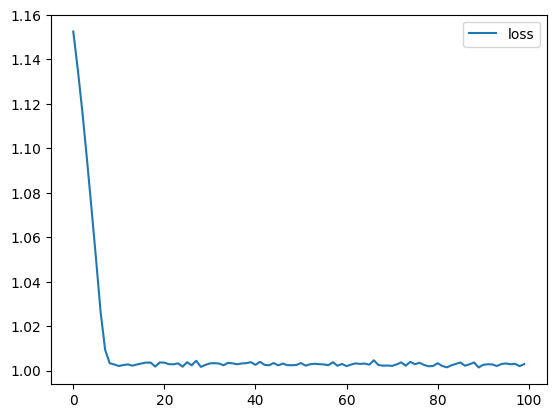

In [ ]:
pd.DataFrame(history.history).plot()

그래프도 많이 진동하지 않고 손실 값도 최저로 낮게 나왔다.

최저 손실값: 1.0014

#### 6차 하이퍼파라미터 조정
- 6층 신경망
- 노드 4->16->24->36->27->18->3
- 활성화 함수: sigmoid 함수
- 손실 함수 : categorical_hinge 사용
- 학습률 0.05
- 학습 횟수 500회
- 배치 사이즈 25

In [ ]:
lr = 0.05
opt = tf.keras.optimizers.SGD(learning_rate=lr)
model = final_Model()
model.compile(optimizer=opt,loss = 'categorical_hinge')
history = model.fit(inputs_train.astype(np.float32), targets_train.astype(np.float32), epochs=500, batch_size=25)

Epoch 1/500
6/6 [==============================] - 4s 6ms/step - loss: 1.0374
Epoch 2/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0144
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0039
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0026
Epoch 5/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0039
Epoch 6/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0019
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 1.0050
Epoch 8/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0031
Epoch 9/500
6/6 [==============================] - 0s 7ms/step - loss: 1.0023
Epoch 10/500
6/6 [==============================] - 0s 6ms/step - loss: 1.0032
Epoch 11/500
6/6 [==============================] - 0s 6ms/step - loss: 1.0026
Epoch 12/500
6/6 [==============================] - 0s 5ms/step - loss: 1.0047
Epoch 13/500
6/6 [==============================] - 0s 5ms/st

학습률이나 학습횟수를 늘려도 소용이 없었다.